## Autoencoder

In [1]:
import numpy as np
import torch

In [2]:
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms
totensor = transforms.ToTensor()
traindata = datasets.MNIST(download=True, root = "./data", train = True, transform = totensor)
testdata = datasets.MNIST(download=True, root = "./data", train = False, transform = totensor)
trainloader = DataLoader(dataset = traindata, batch_size = 64, shuffle = True)
testloader = DataLoader(dataset = testdata, batch_size = 64, shuffle = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
class autoencoder(torch.nn.Module):
    def __init__(self, lat_dim):
        super().__init__()
        self.encoder = torch.nn.Sequential(torch.nn.Linear(28*28, lat_dim), torch.nn.ReLU())
        self.decoder = torch.nn.Sequential(torch.nn.Linear(lat_dim, 28*28), torch.nn.Sigmoid())
    def forward(self,x):
        return self.decoder(self.encoder(x))

model = autoencoder(32).cuda()
loss_function = torch.nn.MSELoss()
  
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters())

In [4]:
def train(model, epochs):
    for epoch in range(epochs):
        trlosses = []
        tslosses = []
        for (images, other) in trainloader:
            images = images.reshape(-1, 28*28).cuda()
            output = model(images)
            loss = loss_function(output, images)
            trlosses.append(loss)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        for (images, other) in testloader:
            images = images.reshape(-1, 28*28).cuda()
            output = model(images)
            loss = loss_function(output, images)
            tslosses.append(loss)
            optimizer.zero_grad()
        print(f"epoch {epoch}:\nTraining Loss: {sum(trlosses)/len(trlosses)}\nTesting Loss: {sum(tslosses)/len(tslosses)}")

In [5]:
train(model, 20)

epoch 0:
Training Loss: 0.04614754766225815
Testing Loss: 0.026013238355517387
epoch 1:
Training Loss: 0.02140062302350998
Testing Loss: 0.01768031343817711
epoch 2:
Training Loss: 0.016468457877635956
Testing Loss: 0.014547677710652351
epoch 3:
Training Loss: 0.014397175051271915
Testing Loss: 0.013543264009058475
epoch 4:
Training Loss: 0.013798221945762634
Testing Loss: 0.013230234384536743
epoch 5:
Training Loss: 0.013530239462852478
Testing Loss: 0.013023768551647663
epoch 6:
Training Loss: 0.013378971256315708
Testing Loss: 0.012888055294752121
epoch 7:
Training Loss: 0.013282462023198605
Testing Loss: 0.012837344780564308
epoch 8:
Training Loss: 0.013208519667387009
Testing Loss: 0.012766984291374683
epoch 9:
Training Loss: 0.013154616579413414
Testing Loss: 0.012718777172267437
epoch 10:
Training Loss: 0.01310912799090147
Testing Loss: 0.012669379822909832
epoch 11:
Training Loss: 0.013072402216494083
Testing Loss: 0.012630959041416645
epoch 12:
Training Loss: 0.013032185845077

In [6]:
import matplotlib.pyplot as plt

In [7]:
import random

In [8]:
def plot_results(model):
    for i in range(10):
        ind = random.randint(0,10000)
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        axes[0].imshow(testdata[ind][0].reshape(28,28))
        axes[0].set_title("Original")
        axes[1].imshow(model.cpu()(testdata[ind][0].reshape(-1)).reshape(28,28).detach().numpy())
        axes[1].set_title("Reconstruction")
    plt.show()

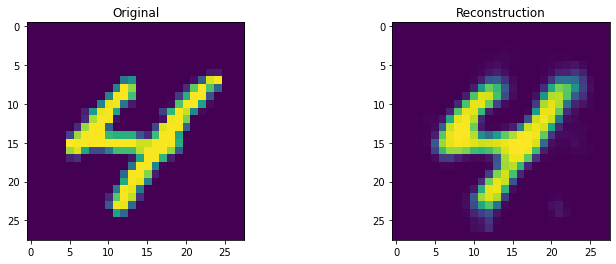

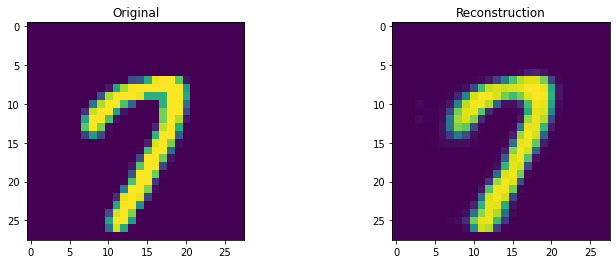

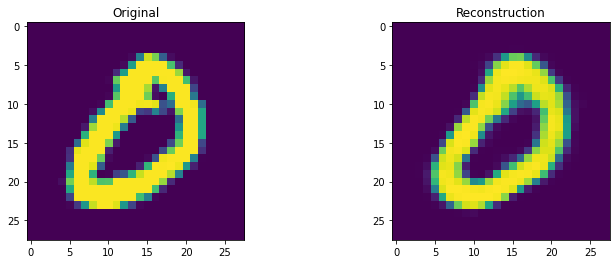

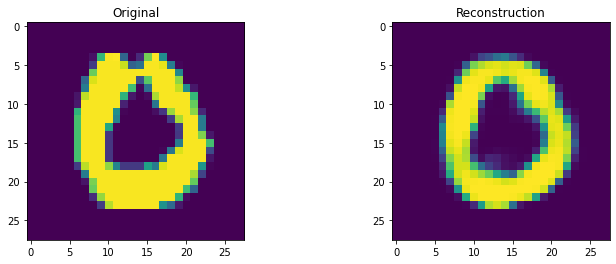

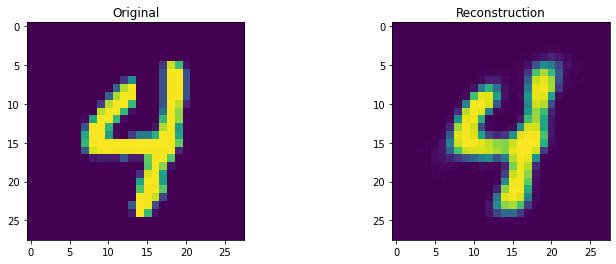

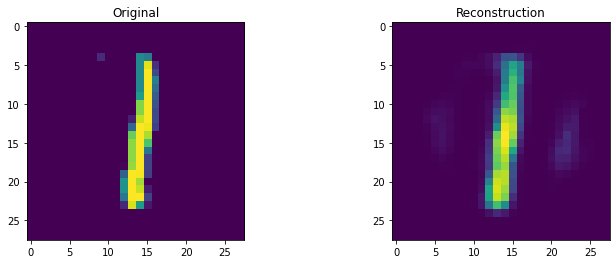

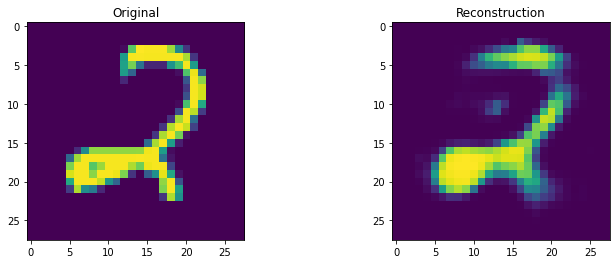

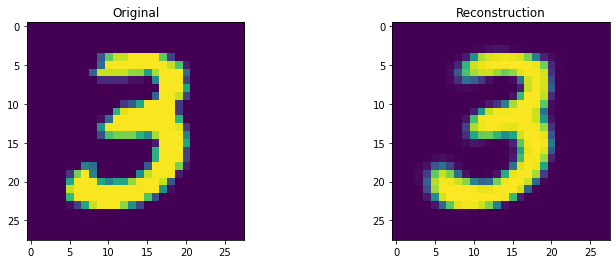

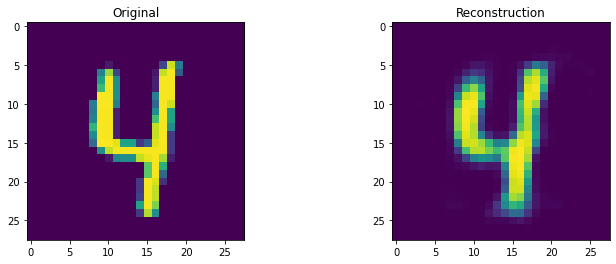

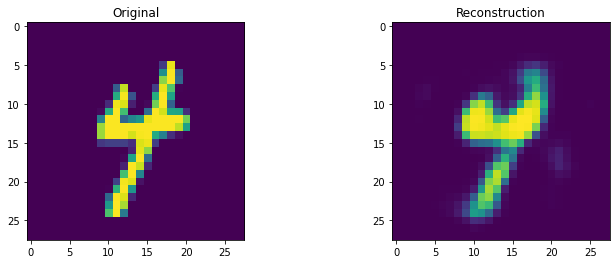

In [9]:
plot_results(model)

## Deep autoencoder

In [10]:
class deepautoencoder(torch.nn.Module):
    def __init__(self, lat_dim):
        super().__init__()
        self.encoder = torch.nn.Sequential(torch.nn.Linear(28*28, lat_dim*8),
                                           torch.nn.ReLU(),
                                           torch.nn.Linear(lat_dim*8, lat_dim*4),
                                           torch.nn.ReLU(),
                                           torch.nn.Linear(lat_dim*4, lat_dim*2),
                                           torch.nn.ReLU(),
                                           torch.nn.Linear(lat_dim*2, lat_dim),
                                           torch.nn.ReLU(),)
        self.decoder = torch.nn.Sequential(torch.nn.Linear(lat_dim, lat_dim*2),
                                           torch.nn.ReLU(),
                                           torch.nn.Linear(lat_dim*2, lat_dim*4),
                                           torch.nn.ReLU(),
                                           torch.nn.Linear(lat_dim*4, lat_dim*8),
                                           torch.nn.ReLU(),
                                           torch.nn.Linear(lat_dim*8, 28*28),
                                           torch.nn.Sigmoid())
    def forward(self,x):
        return self.decoder(self.encoder(x))

In [11]:
deepmodel = deepautoencoder(32).cuda()

In [12]:
optimizer = torch.optim.Adam(deepmodel.parameters())

In [13]:
train(deepmodel, 20)

epoch 0:
Training Loss: 0.05158597603440285
Testing Loss: 0.03548567369580269
epoch 1:
Training Loss: 0.02937924675643444
Testing Loss: 0.025835402309894562
epoch 2:
Training Loss: 0.024563182145357132
Testing Loss: 0.023040374740958214
epoch 3:
Training Loss: 0.021696148440241814
Testing Loss: 0.020046168938279152
epoch 4:
Training Loss: 0.019047481939196587
Testing Loss: 0.01762460544705391
epoch 5:
Training Loss: 0.017127927392721176
Testing Loss: 0.016351738944649696
epoch 6:
Training Loss: 0.0159598458558321
Testing Loss: 0.015434300526976585
epoch 7:
Training Loss: 0.01506885513663292
Testing Loss: 0.014633470214903355
epoch 8:
Training Loss: 0.014415070414543152
Testing Loss: 0.014192692004144192
epoch 9:
Training Loss: 0.013774349354207516
Testing Loss: 0.013702168129384518
epoch 10:
Training Loss: 0.01313973031938076
Testing Loss: 0.012840458191931248
epoch 11:
Training Loss: 0.01267942227423191
Testing Loss: 0.012305435724556446
epoch 12:
Training Loss: 0.012192468158900738
T

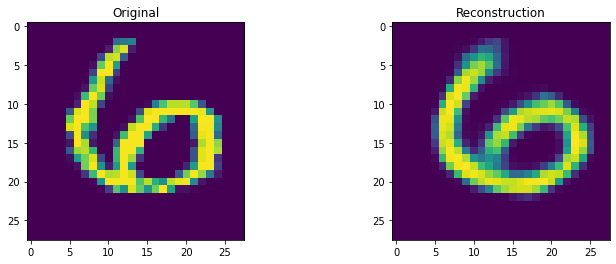

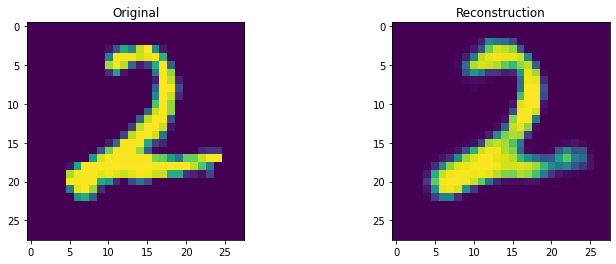

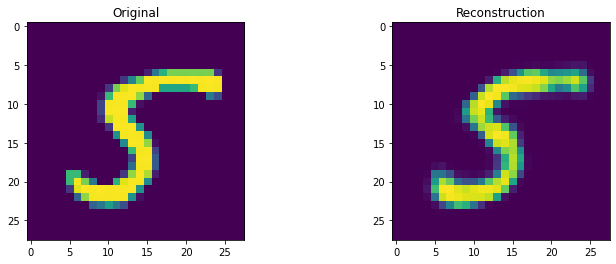

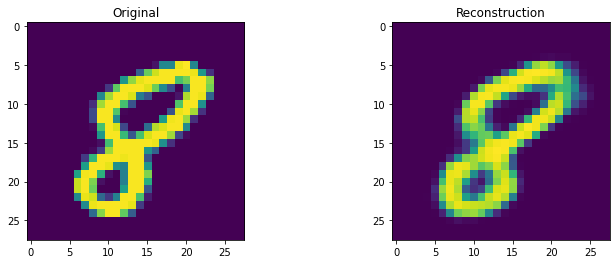

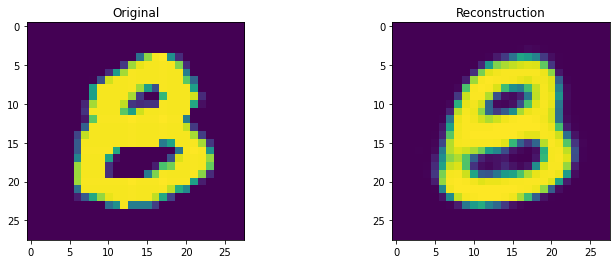

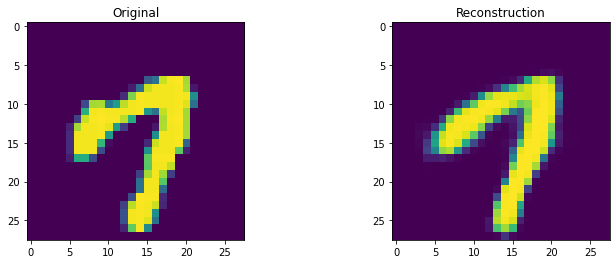

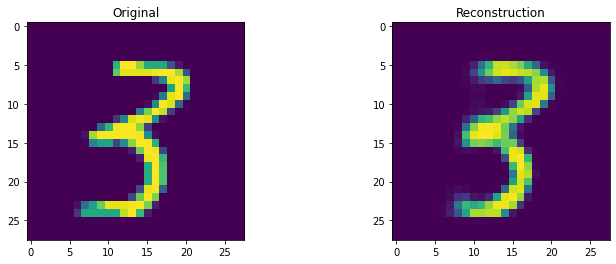

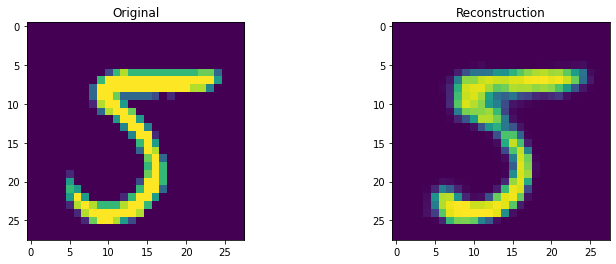

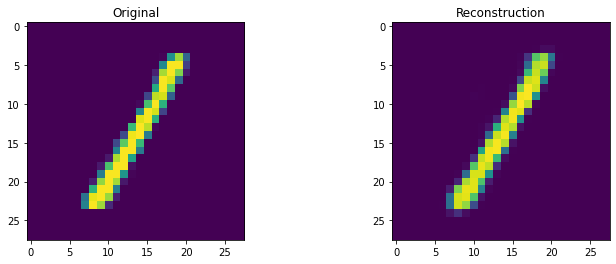

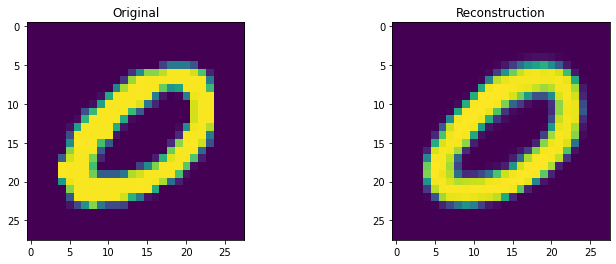

In [14]:
plot_results(deepmodel)

## Convolutional autoencoder and application to image denoising

In [15]:
mat = (traindata[0][0].reshape(28,28) + 0.5*np.random.normal(loc = 0.0, scale=1.0, size=(28,28))).numpy()
mat.dtype

dtype('float64')

In [16]:
class CNNautoencoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = torch.nn.Sequential(torch.nn.Conv2d(1,32,3),
                                           torch.nn.ReLU(),
                                           torch.nn.Conv2d(32,64,3),
                                           torch.nn.ReLU(),
                                           torch.nn.Conv2d(64,128,3),
                                           torch.nn.ReLU())
        self.decoder = torch.nn.Sequential(torch.nn.ConvTranspose2d(128,64,3),
                                           torch.nn.ReLU(),
                                           torch.nn.ConvTranspose2d(64,32,3),
                                           torch.nn.ReLU(),
                                           torch.nn.ConvTranspose2d(32,1,3),
                                           torch.nn.Sigmoid())
    def forward(self,x):
        return self.decoder(self.encoder(x))

In [17]:
denoiser = CNNautoencoder().cuda()
optimizer = torch.optim.Adam(denoiser.parameters())

In [18]:
def train_denoiser(model, epochs):
    for epoch in range(epochs):
        trlosses = []
        tslosses = []
        for (images, other) in trainloader:
            images = images.reshape(-1, 1, 28, 28)
            noise = 0.1*np.random.normal(loc = 0.0, scale=1.0, size=(images.shape[0], 1, 28, 28))
            noisy_images = (images + noise).type(torch.FloatTensor).cuda()
            output = model(noisy_images)
            loss = loss_function(output, images.cuda())
            trlosses.append(loss)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        for (images, other) in testloader:
            images = images.reshape(-1, 1, 28, 28)
            noise = 0.1*np.random.normal(loc = 0.0, scale=1.0, size=(images.shape[0], 1, 28, 28))
            noisy_images = (images + noise).type(torch.FloatTensor).cuda()
            output = model(noisy_images)
            loss = loss_function(output, images.cuda())
            tslosses.append(loss)
            optimizer.zero_grad()
        print(f"epoch {epoch}:\nTraining Loss: {sum(trlosses)/len(trlosses)}\nTesting Loss: {sum(tslosses)/len(tslosses)}")

In [19]:
train_denoiser(denoiser, 20)

epoch 0:
Training Loss: 0.0037670203018933535
Testing Loss: 0.0009820109698921442
epoch 1:
Training Loss: 0.0009589573019184172
Testing Loss: 0.00090589135652408
epoch 2:
Training Loss: 0.0009088783990591764
Testing Loss: 0.0009352724300697446
epoch 3:
Training Loss: 0.0008909812313504517
Testing Loss: 0.0008667588699609041
epoch 4:
Training Loss: 0.0008715324802324176
Testing Loss: 0.0008726589730940759
epoch 5:
Training Loss: 0.0008584434981457889
Testing Loss: 0.0008417388889938593
epoch 6:
Training Loss: 0.0008356496691703796
Testing Loss: 0.000834609498269856
epoch 7:
Training Loss: 0.0008268927922472358
Testing Loss: 0.000816355284769088
epoch 8:
Training Loss: 0.0008216123678721488
Testing Loss: 0.0008092680363915861
epoch 9:
Training Loss: 0.0008149757049977779
Testing Loss: 0.0008123127045109868
epoch 10:
Training Loss: 0.0008111849892884493
Testing Loss: 0.0008028308511711657
epoch 11:
Training Loss: 0.0008065173169597983
Testing Loss: 0.000798488617874682
epoch 12:
Training 

In [20]:
def plot_denoising_results(model):
    for i in range(10):
        ind = random.randint(0,10000)
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        img = testdata[ind][0].reshape(1,1,28,28)
        noise = 0.25*np.random.normal(loc = 0.0, scale=1.0, size=(img.shape[0], 1, 28, 28))
        noisy_image = img+noise
        axes[0].imshow(noisy_image.reshape(28,28))
        axes[0].set_title("Original")
        axes[1].imshow(model.cpu()(noisy_image.type(torch.FloatTensor)).reshape(28,28).detach().numpy())
        axes[1].set_title("Reconstruction")
    plt.show()

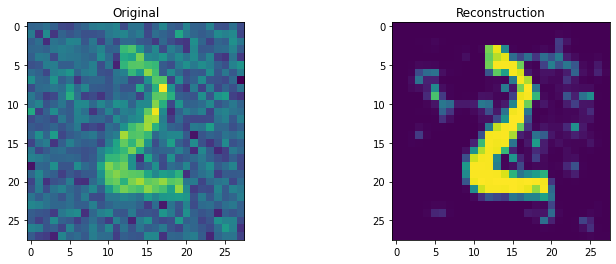

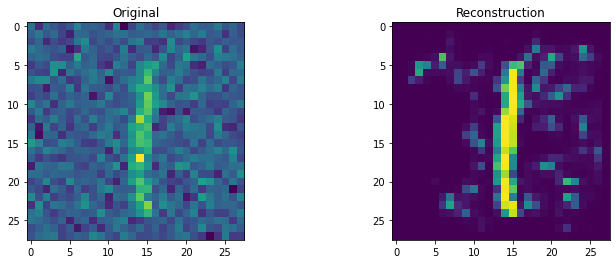

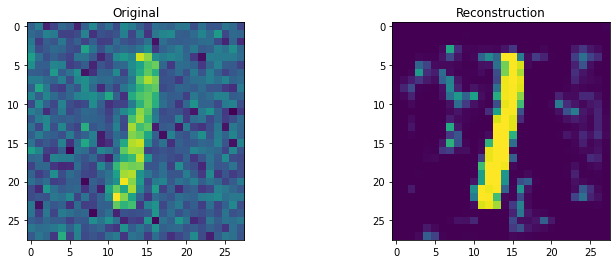

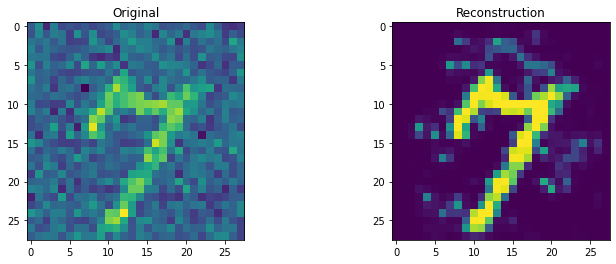

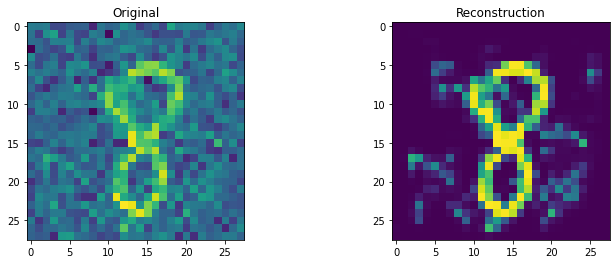

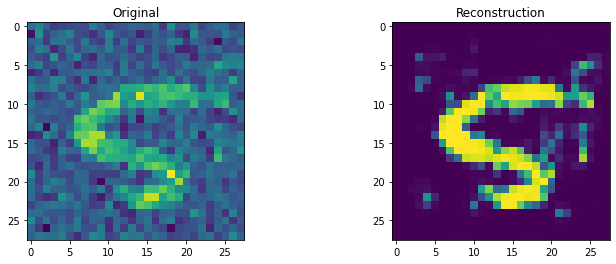

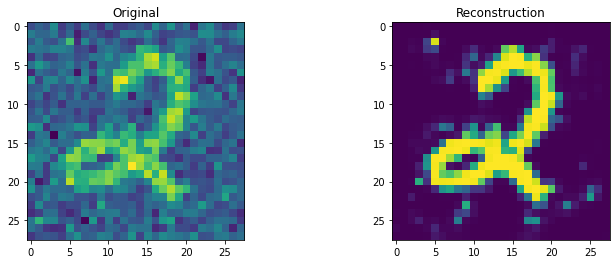

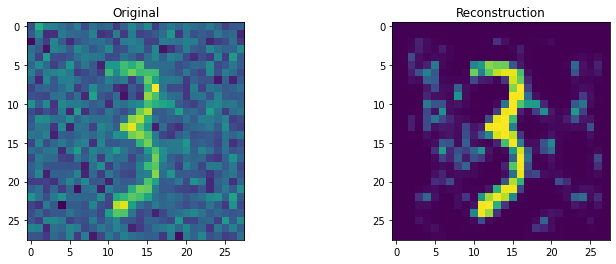

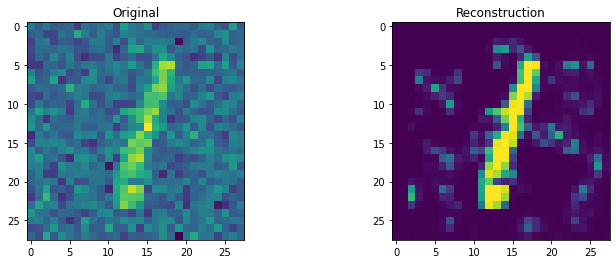

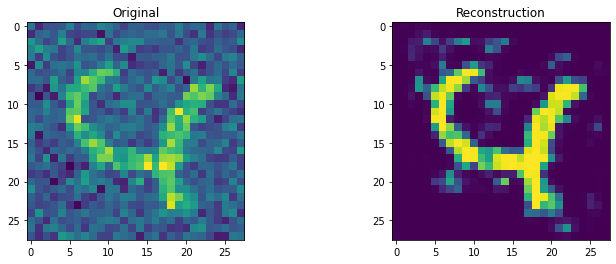

In [21]:
plot_denoising_results(denoiser)